# <center> Naive Bayes Calssification</center>

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("dataset.csv")
df.head()

# no of numerical and categorical values

,PM2.5,PM10,NO2,SO2,O3,AQI
0,104.00,148.50,23.00,15.30,117.62,3.0
1,94.50,142.00,16.25,17.00,136.23,3.0
2,82.75,126.50,14.83,15.40,149.92,3.0
3,68.50,117.00,13.60,21.80,161.70,3.0
4,69.25,112.25,11.80,21.38,161.68,3.0


In [2]:
df.shape

(129277, 6)

<AxesSubplot:>

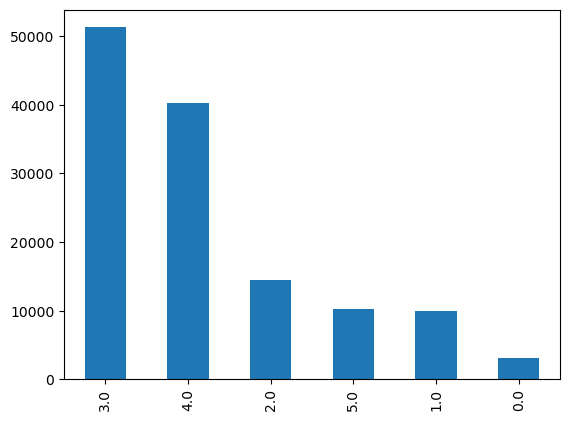

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
df['AQI'].value_counts().plot.bar()

In [8]:
import numpy as np
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])
print("Number of numerical variables: ", numeric_data.shape[1])
print("Numerical attributes: ", numeric_data.columns)

print("Number of categorical variables: ", categorical_data.shape[1])
print("Categorical attributes: ",categorical_data.columns)

Number of numerical variables:  6
Numerical attributes:  Index(['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'AQI'], dtype='object')
Number of categorical variables:  0
Categorical attributes:  Index([], dtype='object')


In [10]:
df.isnull().sum()

PM2.5    0
PM10     0
NO2      0
SO2      0
O3       0
AQI      0
dtype: int64

### Data preprocessing

In [12]:
from sklearn import preprocessing
#Feature scaling - min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
# encD = pd.DataFrame(scaled, columns=df.columns)
encD=df
encD.head()

,PM2.5,PM10,NO2,SO2,O3,AQI
0,104.00,148.50,23.00,15.30,117.62,3.0
1,94.50,142.00,16.25,17.00,136.23,3.0
2,82.75,126.50,14.83,15.40,149.92,3.0
3,68.50,117.00,13.60,21.80,161.70,3.0
4,69.25,112.25,11.80,21.38,161.68,3.0


In [13]:
encD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129277 entries, 0 to 129276
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PM2.5   129277 non-null  float64
 1   PM10    129277 non-null  float64
 2   NO2     129277 non-null  float64
 3   SO2     129277 non-null  float64
 4   O3      129277 non-null  float64
 5   AQI     129277 non-null  float64
dtypes: float64(6)
memory usage: 5.9 MB


### Training the model

In [14]:
cols=['PM2.5',"PM10","NO2","SO2","O3"]
X=encD[cols]
y=encD['AQI']

In [15]:
#Split into train and test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) 

### Gaussian Naive Bayes Classification

In [16]:
from sklearn.naive_bayes import GaussianNB 
gNBmodel = GaussianNB() 
gNBmodel.fit(X_train,y_train) 

GaussianNB()

In [17]:
y_pred = gNBmodel.predict(X_test)
y_pred

array([3., 3., 4., ..., 5., 3., 5.])

In [18]:
print('Accuracy of Gaussian Naive Bayes on test set: {:.2f}'.format
(gNBmodel.score(X_test, y_test))) 

Accuracy of Gaussian Naive Bayes on test set: 0.61


In [19]:
from sklearn.metrics import mean_absolute_error
y_train_pred = gNBmodel.predict(X_train) 
mae_train = mean_absolute_error(y_train, y_train_pred) 
mae_test = mean_absolute_error(y_test, y_pred) 
print(mae_train) 
print(mae_test) 
if mae_train < mae_test:
    print("Overfitting is present")
else:
    print("Underfitting is present")

0.4338498826805559
0.42874823538512113


In [20]:
if mae_train < mae_test:
    print("Overfitting is present")
else:
    print("Underfitting is present")

Underfitting is present


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[  633,   428,   116,    32,    14,     0],
       [  300,  1780,  1209,   640,    60,     5],
       [   30,   794,  1884,  2691,   293,    28],
       [   17,   139,  1077, 13561,  5278,   358],
       [    2,     4,    25,  2354, 10240,  3605],
       [    0,     0,     0,    12,   702,  3400]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.52      0.57      1223
         1.0       0.57      0.45      0.50      3994
         2.0       0.44      0.33      0.38      5720
         3.0       0.70      0.66      0.68     20430
         4.0       0.62      0.63      0.62     16230
         5.0       0.46      0.83      0.59      4114

    accuracy                           0.61     51711
   macro avg       0.57      0.57      0.56     51711
weighted avg       0.62      0.61      0.61     51711



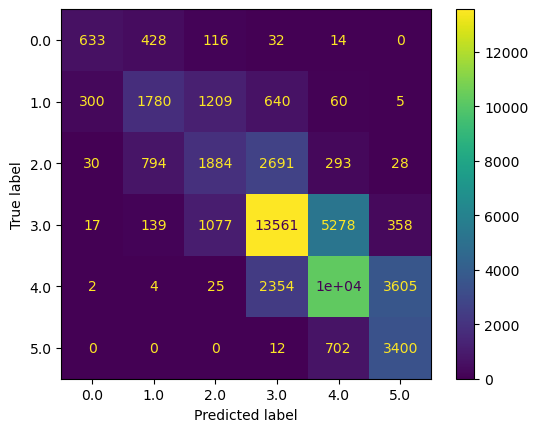

In [23]:
#Analyse model performance visually
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=gNBmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=gNBmodel.classes_)
disp.plot()

### Multinomial Naive Bayes Classification

In [24]:
#Train the model
from sklearn.naive_bayes import MultinomialNB 
mNBmodel = MultinomialNB() 
mNBmodel.fit(X_train,y_train) 

MultinomialNB()

In [25]:
y_pred = mNBmodel.predict(X_test)
y_pred

array([2., 1., 5., ..., 5., 4., 5.])

In [26]:
print('Accuracy of Multinomial Naive Bayes on test set:{:.2f}'.format(mNBmodel.score(X_test, y_test))) 

Accuracy of Multinomial Naive Bayes on test set:0.31


In [27]:
from sklearn.metrics import mean_absolute_error
y_train_pred = mNBmodel.predict(X_train) 
mae_train = mean_absolute_error(y_train, y_train_pred) 
mae_test = mean_absolute_error(y_test, y_pred) 
print(mae_train) 
print(mae_test)

0.9864631410669623
0.9900988184332153


In [28]:
if mae_train < mae_test:
 print("Overfitting is present") 
else: 
 print("Underfitting is present") 

Overfitting is present


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 687,  246,  210,   67,    8,    5],
       [1438, 1124,  695,  561,  128,   48],
       [ 708, 1696, 1084, 1189,  615,  428],
       [ 628, 2617, 3531, 5921, 4117, 3616],
       [ 135,  951, 1275, 4402, 4877, 4590],
       [   1,   34,   52,  503, 1393, 2131]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.19      0.56      0.29      1223
         1.0       0.17      0.28      0.21      3994
         2.0       0.16      0.19      0.17      5720
         3.0       0.47      0.29      0.36     20430
         4.0       0.44      0.30      0.36     16230
         5.0       0.20      0.52      0.29      4114

    accuracy                           0.31     51711
   macro avg       0.27      0.36      0.28     51711
weighted avg       0.37      0.31      0.32     51711

